# <center> Content Based Recommendation System

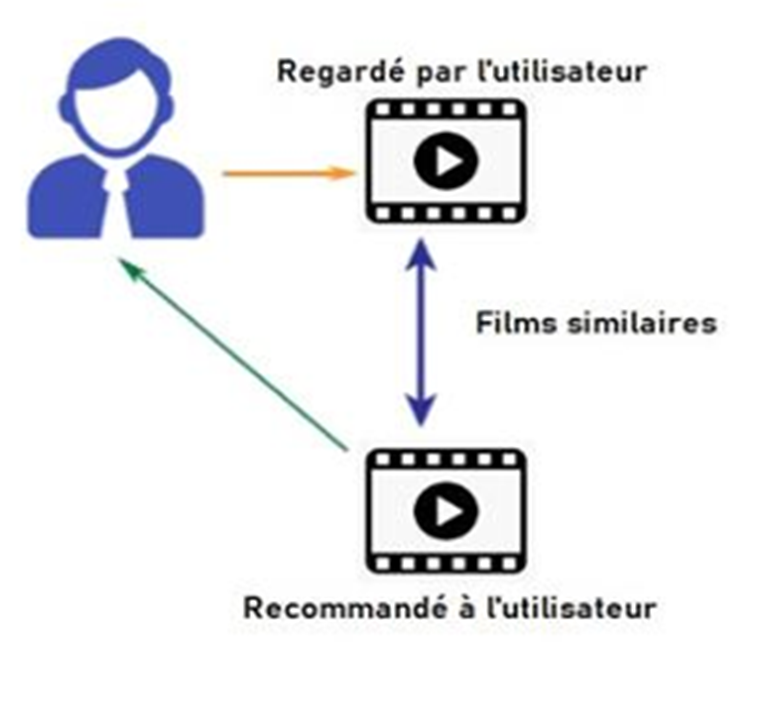

In [1]:
import pandas as pd

import numpy as np

The dataset contains two CSV files, credits, and movies. The credits file contains all the metadata information about the movie and the movie file contains the information like name and id of the movie, budget, languages in the movie that has been released, etc.

In [2]:
credits = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
movies_df = pd.read_csv("tmdb_5000_movies.csv")

In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
print("Credits:",credits.shape)
print("Movies Dataframe:",movies_df.shape)

Credits: (4803, 4)
Movies Dataframe: (4803, 20)


In [7]:
credits_column_renamed = credits.rename(index=str, columns={"movie_id": "id"})
movies_df_merge = movies_df.merge(credits_column_renamed, on='id')
movies_df_merge.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
movies_cleaned_df = movies_df_merge.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [37]:
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

In [9]:
movies_cleaned_df=movies_cleaned_df.dropna()

In [10]:
movies_cleaned_df.duplicated().sum()

0

In [11]:
# Filling NaNs with empty string
movies_cleaned_df['overview'] = movies_cleaned_df['overview'].fillna('')

### Content Based Recommendation System

Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [12]:
movies_cleaned_df.head(1)['overview']

0    In the 22nd century, a paraplegic Marine is di...
Name: overview, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=10,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')



In [14]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies_cleaned_df['overview'])

In [15]:
tfv_matrix

<3959x2376 sparse matrix of type '<class 'numpy.float64'>'
	with 72847 stored elements in Compressed Sparse Row format>

In [16]:
tfv_matrix.shape

(3959, 2376)

In [17]:
# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfv_matrix.toarray(), columns=tfv.get_feature_names_out())

# Example: Display the DataFrame
print(tfidf_df.head())

   000    1   10  10 year  10 year old  10 years   11   12  12 year  \
0  0.0  0.0  0.0      0.0          0.0       0.0  0.0  0.0      0.0   
1  0.0  0.0  0.0      0.0          0.0       0.0  0.0  0.0      0.0   
2  0.0  0.0  0.0      0.0          0.0       0.0  0.0  0.0      0.0   
3  0.0  0.0  0.0      0.0          0.0       0.0  0.0  0.0      0.0   
4  0.0  0.0  0.0      0.0          0.0       0.0  0.0  0.0      0.0   

   12 year old  ...  young man  young men  young son  young woman  younger  \
0          0.0  ...        0.0        0.0        0.0          0.0      0.0   
1          0.0  ...        0.0        0.0        0.0          0.0      0.0   
2          0.0  ...        0.0        0.0        0.0          0.0      0.0   
3          0.0  ...        0.0        0.0        0.0          0.0      0.0   
4          0.0  ...        0.0        0.0        0.0          0.0      0.0   

   younger brother  youth  zombie  zombies  zone  
0              0.0    0.0     0.0      0.0   0.0  
1 

Now that we have a matrix of our words, we can begin calculating similarity scores. This metric will help us pick out movies with plot summaries similar to the movie submitted by the user.

Let's experiment it with the ** cosine_similarity **

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
similarity = cosine_similarity(tfv_matrix)

In [20]:
similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.0129431 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.02000528],
       [0.        , 0.        , 0.0129431 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02000528, 0.        ,
        1.        ]])

In [21]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_cleaned_df.index, index=movies_cleaned_df['original_title']).drop_duplicates()

In [22]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
Bang                                        4795
Primer                                      4796
El Mariachi                                 4798
Newlyweds                                   4799
Shanghai Calling                            4801
Length: 3959, dtype: int64

In [78]:
indices['The Dark Knight Rises']

3

In [80]:
similarity[3]

array([0.05095766, 0.        , 0.0129079 , ..., 0.        , 0.03222513,
       0.08074505])

In [82]:
list(enumerate(similarity[indices['The Dark Knight Rises']]))

[(0, 0.05095765846455046),
 (1, 0.0),
 (2, 0.012907904229584608),
 (3, 1.0),
 (4, 0.042861545041546496),
 (5, 0.02412805725648754),
 (6, 0.07841337966350684),
 (7, 0.012926158133453254),
 (8, 0.0535059680106635),
 (9, 0.07696603571447908),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.00981625955440662),
 (15, 0.04683520736756199),
 (16, 0.04957838902726737),
 (17, 0.017054228327840336),
 (18, 0.05655855694378356),
 (19, 0.020955877960479),
 (20, 0.04916046771168838),
 (21, 0.0),
 (22, 0.01707624127619783),
 (23, 0.03464397892450674),
 (24, 0.07199038546993103),
 (25, 0.0452277423853442),
 (26, 0.02127451027129749),
 (27, 0.029784403208303896),
 (28, 0.0617187149177336),
 (29, 0.04688322665219535),
 (30, 0.07905894896424612),
 (31, 0.0),
 (32, 0.01869478696161265),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0656213772475377),
 (36, 0.019736915094531217),
 (37, 0.0638814010162576),
 (38, 0.03458432980401664),
 (39, 0.0),
 (40, 0.04160283347186755),
 (41, 0.026798396949553577),
 (42, 0.01

In [84]:
sorted(list(enumerate(similarity[indices['The Dark Knight Rises']])), key=lambda x: x[1], reverse=True)

[(3, 1.0),
 (2310, 0.29639702555403724),
 (291, 0.28779059046793326),
 (1294, 0.2725029610198702),
 (1136, 0.233212206965022),
 (1286, 0.20733619458772629),
 (1157, 0.20196226371729092),
 (849, 0.19382655774307242),
 (2043, 0.18717745656606766),
 (1417, 0.1818392412052376),
 (63, 0.17832559589464927),
 (279, 0.17568868195414758),
 (3173, 0.16043754899297555),
 (1329, 0.16023726725506296),
 (3873, 0.1601571225901221),
 (1895, 0.15890101639535115),
 (3116, 0.1490212447740432),
 (155, 0.14885612345582508),
 (1470, 0.14323815971686457),
 (3763, 0.1411454223791979),
 (1260, 0.13982173462239927),
 (231, 0.13934397861363426),
 (1662, 0.13923992605412167),
 (755, 0.13875026727500483),
 (1948, 0.13668395635377426),
 (1184, 0.136452737061799),
 (1782, 0.13426189130691776),
 (2205, 0.13348910492890395),
 (3416, 0.13289442021845052),
 (2105, 0.1325935052515046),
 (3169, 0.13242182186677465),
 (975, 0.13171578843451007),
 (631, 0.13080252770712053),
 (1200, 0.1304633108813829),
 (843, 0.12991433159

In [23]:
def give_rec(title, sim=similarity):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sim_scores = list(enumerate(sim[idx]))

    # Sort the movies 
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Top 10 most similar movies
    return movies_cleaned_df['original_title'].iloc[movie_indices]

In [24]:
# Testing our content-based recommendation system with the seminal film Spy Kids
give_rec('Spy Kids')


3966                Point Blank
3158                      Alien
1118               The Mechanic
1328                   The Town
1771             The 51st State
2002                    Haywire
47      Star Trek Into Darkness
3122            Blonde Ambition
702             The Italian Job
2207                  12 Rounds
Name: original_title, dtype: object

In [25]:
give_rec('Avatar')

3604                          Apollo 18
151                             Beowulf
847                            Semi-Pro
1784                          EverAfter
311        The Adventures of Pluto Nash
529                    Tears of the Sun
1213        Aliens vs Predator: Requiem
823                        Crimson Tide
36      Transformers: Age of Extinction
1547                         The Butler
Name: original_title, dtype: object